# QC pVCF files UKBB

## Aim

To do QC on the UKBB pVCF data and return plink files for downstream GWAS analysis


## Input

* pVCF file

## Ouput

* bed, bim and fam files per chromosome

## Understanding pre-QC done in the UKBB



## Software

In this case we will use [bcftools](http://www.htslib.org/download/)

## Conventions
```
INFO/AC        Number:A  Type:Integer  ..  Allele count in genotypes
INFO/AC_Hom    Number:A  Type:Integer  ..  Allele counts in homozygous genotypes
INFO/AC_Het    Number:A  Type:Integer  ..  Allele counts in heterozygous genotypes
INFO/AC_Hemi   Number:A  Type:Integer  ..  Allele counts in hemizygous genotypes
INFO/AF        Number:A  Type:Float    ..  Allele frequency
INFO/AN        Number:1  Type:Integer  ..  Total number of alleles in called genotypes
INFO/ExcHet    Number:A  Type:Float    ..  Test excess heterozygosity; 1=good, 0=bad
INFO/END       Number:1  Type:Integer  ..  End position of the variant
INFO/F_MISSING Number:1  Type:Float    ..  Fraction of missing genotypes (all samples, experimental)
INFO/HWE       Number:A  Type:Float    ..  HWE test (PMID:15789306); 1=good, 0=bad
INFO/MAF       Number:A  Type:Float    ..  Minor Allele frequency
INFO/NS        Number:1  Type:Integer  ..  Number of samples with data
INFO/TYPE      Number:.  Type:String   ..  The record type (REF,SNP,MNP,INDEL,etc)
FORMAT/VAF     Number:A  Type:Float    ..  The fraction of reads with the alternate allele, requires FORMAT/AD
FORMAT/VAF1    Number:1  Type:Float    ..  The same as FORMAT/VAF but for all alternate alleles cumulatively
TAG=func(TAG)  Number:1  Type:Integer  ..  Experimental support for user-defined expressions such as "DP=sum(DP)". This is currently very basic, to be extended.
```

In [1]:
# Plugin commands

## Print a detailed list of available tags
bcftools +fill-tags -- -l

INFO/AC        Number:A  Type:Integer  ..  Allele count in genotypes
INFO/AC_Hom    Number:A  Type:Integer  ..  Allele counts in homozygous genotypes
INFO/AC_Het    Number:A  Type:Integer  ..  Allele counts in heterozygous genotypes
INFO/AC_Hemi   Number:A  Type:Integer  ..  Allele counts in hemizygous genotypes
INFO/AF        Number:A  Type:Float    ..  Allele frequency
INFO/AN        Number:1  Type:Integer  ..  Total number of alleles in called genotypes
INFO/ExcHet    Number:A  Type:Float    ..  Test excess heterozygosity; 1=good, 0=bad
INFO/END       Number:1  Type:Integer  ..  End position of the variant
INFO/F_MISSING Number:1  Type:Float    ..  Fraction of missing genotypes (all samples, experimental)
INFO/HWE       Number:A  Type:Float    ..  HWE test (PMID:15789306); 1=good, 0=bad
INFO/MAF       Number:A  Type:Float    ..  Minor Allele frequency
INFO/NS        Number:1  Type:Integer  ..  Number of samples with data
INFO/TYPE      Number:.  Type:String   ..  The record type (RE

In [3]:
# Fill all available tags -Oz for vcf.gz or -Ob for bcf

bcftools +fill-tags $vcf_file -Oz -o $vcf_out -- -t all

In [ ]:
# Calculate total read depth (INFO/DP) from per-sample depths (FORMAT/DP)

bcftools +fill-tags $vcf_file -Oz -o $vcf_out -- -t 'DP=sum(DP)'

## Produce stats of the VCF files

In [1]:
bcf=~/software/bin/./bcftools
plot=~/software/bin/./plot-vcfstats
vcf_file=/mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/ukb23156_c1_b0_v1.vcf.gz
vcf_out=/mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/ukb23156_c1_b0_v1.test.vcf.gz

## Generate MWE data for real UKBB file

In [ ]:
bcftools view /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/ukb23156_c1_b0_v1.vcf.gz| vcfrandomsample -r 0.012 > /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/chr1_mwe.subset.vcf.gz

### Number of variants per file

In [3]:
$bcf view -H $vcf_file | wc -l

16310



# 1. Preparation

### Index vcf

In [28]:
bcftools view $vcf_file && bcftools index $vcf_file -t # data.vcf.gz.tbi

Restarting kernel "Bash"

About:   VCF/BCF conversion, view, subset and filter VCF/BCF files.
Usage:   bcftools view [options] <in.vcf.gz> [region1 [...]]

Output options:
    -G,   --drop-genotypes              drop individual genotype information (after subsetting if -s option set)
    -h/H, --header-only/--no-header     print the header only/suppress the header in VCF output
    -l,   --compression-level [0-9]     compression level: 0 uncompressed, 1 best speed, 9 best compression [-1]
          --no-version                  do not append version and command line to the header
    -o,   --output <file>               output file name [stdout]
    -O,   --output-type <b|u|z|v>       b: compressed BCF, u: uncompressed BCF, z: compressed VCF, v: uncompressed VCF [v]
    -r, --regions <region>              restrict to comma-separated list of regions
    -R, --regions-file <file>           restrict to regions listed in a file
    -t, --targets [^]<region>           similar to -r but strea

In [ ]:
bcftools index $vcf_file -t

In [ ]:
bcftools +fill-tags -- -l

### Check samples

In [26]:
bcftools query -l $vcf_file | head

1434748
5523981
5023838
4023729
4442146
5654789
4515669
1129683
5327043
4744741



### Check variants: obtain number of variants

In [ ]:
#Obtain number of variants needs to be indexed first
bcftools index -n $vcf_file 

### Inspection of Quality Measurements


In [3]:
$bcf stats -s - $vcf_file >  ~/output/vcf_stats/ukbb_chr1_b1.vchk

In [22]:
plot-vcfstats -p ~/output/vcf_stats/ ~/output/vcf_stats/ukbb_chr1_b1.vchk

Parsing bcftools stats output: /home/dmc2245/output/vcf_stats/ukbb_chr1_b1.vchk
Plotting graphs: python3 plot.py
Creating PDF: tectonic summary.tex >plot-vcfstats.log 2>&1
The command exited with non-zero status, please consult the output of tectonic: /home/dmc2245/output/vcf_stats/plot-vcfstats.log

 at /home/dmc2245/software/bin/plot-vcfstats line 111.
	main::error("The command exited with non-zero status, please consult the o"...) called at /home/dmc2245/software/bin/plot-vcfstats line 2123
	main::create_pdf(HASH(0x564585baf348)) called at /home/dmc2245/software/bin/plot-vcfstats line 72



> /home/dmc2245/output/vcf_stats/depth.0.png (25.4 KiB):

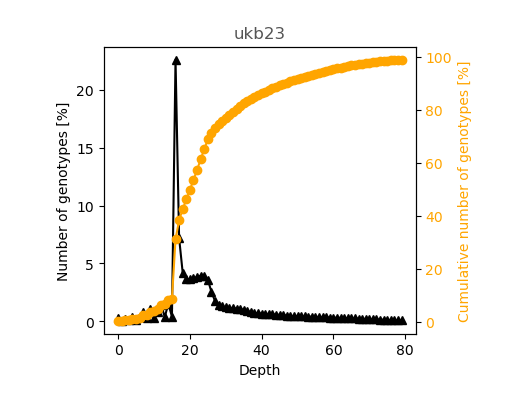

>>> ~/output/vcf_stats/depth.0.png:

bash: /home/dmc2245/output/vcf_stats/depth.0.png: Permission denied



In [10]:
%preview -s png  ~/output/vcf_stats/depth.0.png

> /home/dmc2245/output/vcf_stats/dp_by_sample.0.png (21.0 KiB):

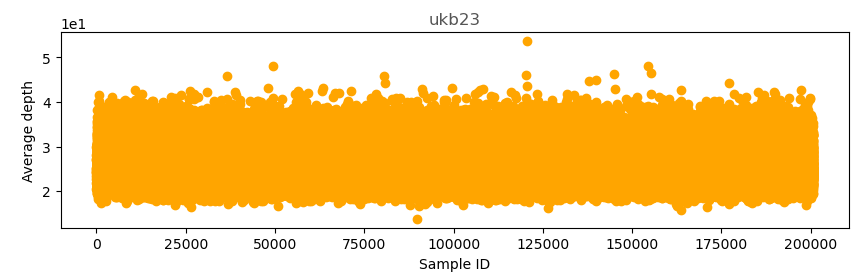

>>> ~/output/vcf_stats/dp_by_sample.0.png:

bash: /home/dmc2245/output/vcf_stats/dp_by_sample.0.png: Permission denied



In [11]:
%preview -s png  ~/output/vcf_stats/dp_by_sample.0.png

> /home/dmc2245/output/vcf_stats/hets_by_sample.0.png (28.0 KiB):

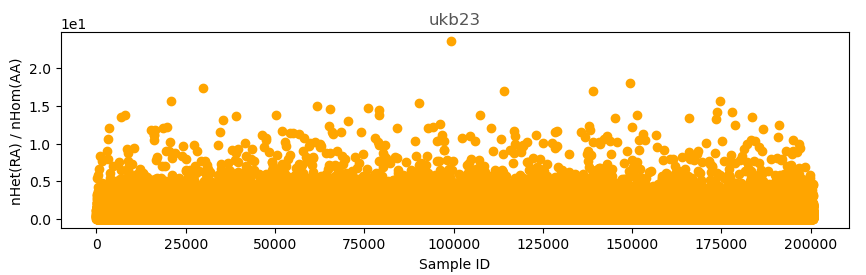

>>> ~/output/vcf_stats/hets_by_sample.0.png:

bash: /home/dmc2245/output/vcf_stats/hets_by_sample.0.png: Permission denied



In [12]:
%preview -s png  ~/output/vcf_stats/hets_by_sample.0.png

> /home/dmc2245/output/vcf_stats/hwe.0.png (32.5 KiB):

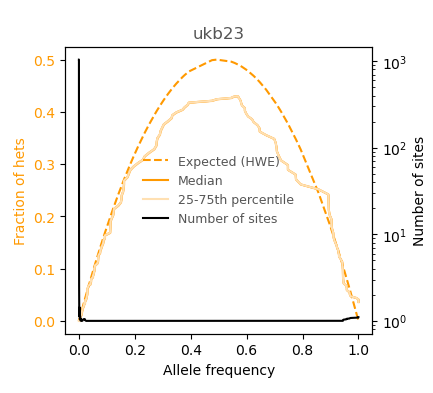

>>> ~/output/vcf_stats/hwe.0.png:

bash: /home/dmc2245/output/vcf_stats/hwe.0.png: Permission denied



In [13]:
%preview -s png  ~/output/vcf_stats/hwe.0.png

> /home/dmc2245/output/vcf_stats/indel_vaf.0.png (30.0 KiB):

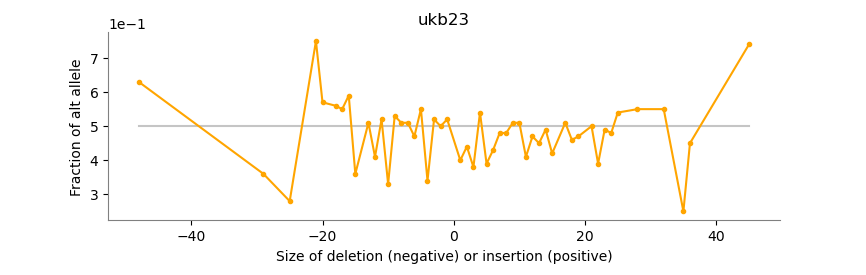

>>> ~/output/vcf_stats/indel_vaf.0.png:

bash: /home/dmc2245/output/vcf_stats/indel_vaf.0.png: Permission denied



In [14]:
%preview -s png  ~/output/vcf_stats/indel_vaf.0.png

> /home/dmc2245/output/vcf_stats/indels.0.png (11.8 KiB):

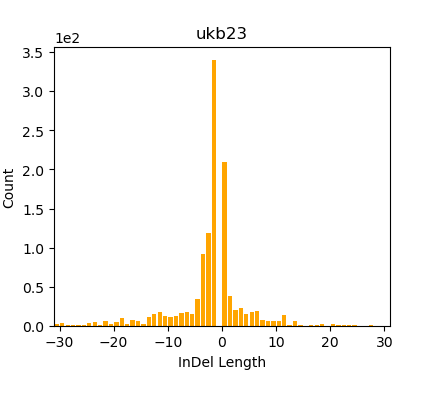

>>> ~/output/vcf_stats/indels.0.png:

bash: /home/dmc2245/output/vcf_stats/indels.0.png: Permission denied



In [15]:
%preview -s png  ~/output/vcf_stats/indels.0.png

> /home/dmc2245/output/vcf_stats/indels_by_sample.0.png (30.0 KiB):

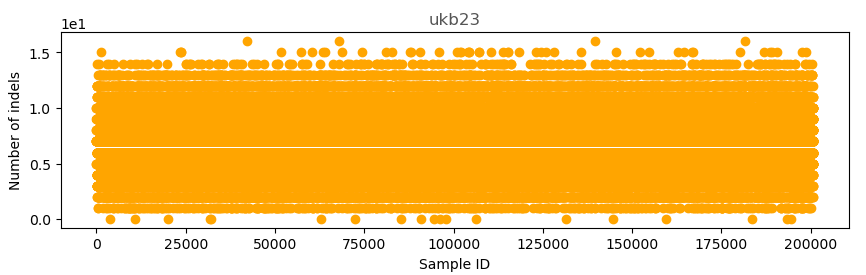

>>> ~/output/vcf_stats/indels_by_sample.0.png:

bash: /home/dmc2245/output/vcf_stats/indels_by_sample.0.png: Permission denied



In [16]:
%preview -s png  ~/output/vcf_stats/indels_by_sample.0.png

> /home/dmc2245/output/vcf_stats/singletons_by_sample.0.png (17.9 KiB):

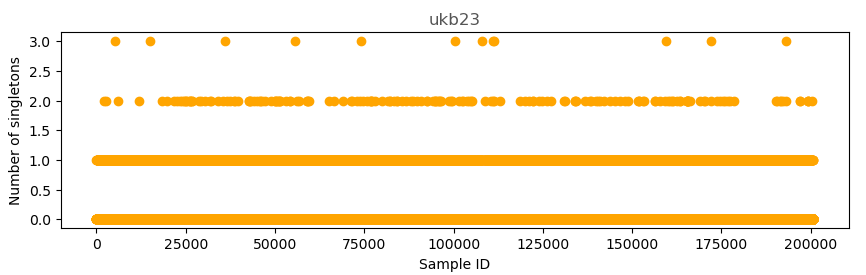

>>> ~/output/vcf_stats/singletons_by_sample.0.png:

bash: /home/dmc2245/output/vcf_stats/singletons_by_sample.0.png: Permission denied



In [17]:
%preview -s png  ~/output/vcf_stats/singletons_by_sample.0.png

> /home/dmc2245/output/vcf_stats/snps_by_sample.0.png (25.9 KiB):

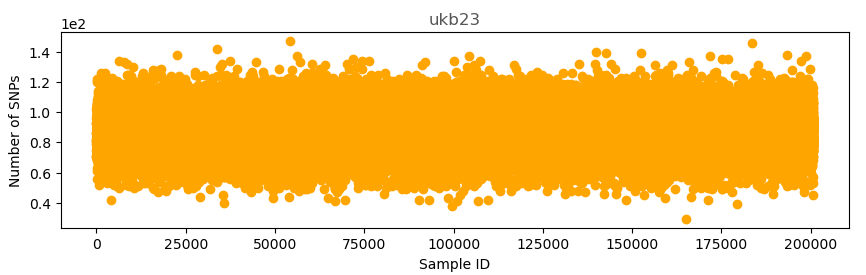

>>> ~/output/vcf_stats/snps_by_sample.0.png:

bash: /home/dmc2245/output/vcf_stats/snps_by_sample.0.png: Permission denied



In [18]:
%preview -s png  ~/output/vcf_stats/snps_by_sample.0.png

> /home/dmc2245/output/vcf_stats/substitutions.0.png (12.3 KiB):

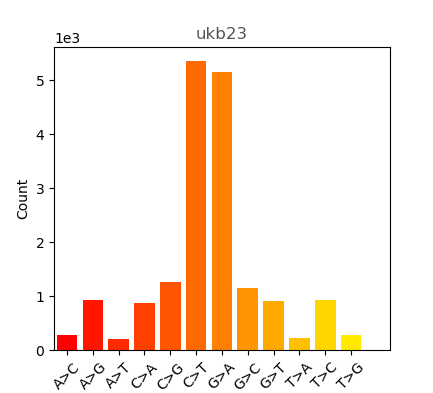

>>> ~/output/vcf_stats/substitutions.0.png:

bash: /home/dmc2245/output/vcf_stats/substitutions.0.png: Permission denied



In [19]:
%preview -s png  ~/output/vcf_stats/substitutions.0.png

> /home/dmc2245/output/vcf_stats/tstv_by_qual.0.png (18.4 KiB):

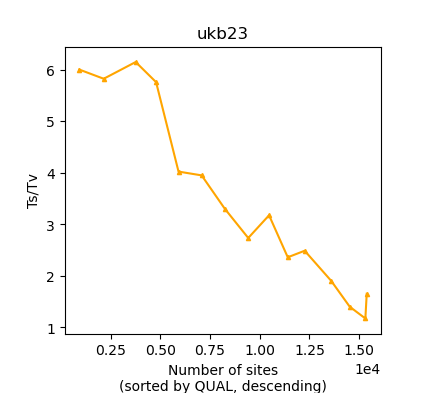

>>> ~/output/vcf_stats/tstv_by_qual.0.png:

bash: /home/dmc2245/output/vcf_stats/tstv_by_qual.0.png: Permission denied



In [20]:
%preview -s png  ~/output/vcf_stats/tstv_by_qual.0.png

> /home/dmc2245/output/vcf_stats/tstv_by_sample.0.png (25.9 KiB):

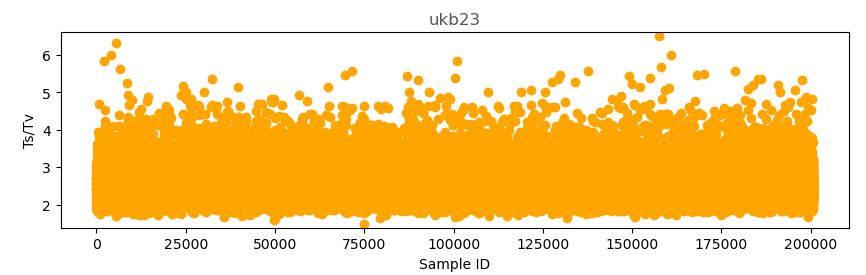

>>> ~/output/vcf_stats/tstv_by_sample.0.png:

bash: /home/dmc2245/output/vcf_stats/tstv_by_sample.0.png: Permission denied



In [21]:
%preview -s png  ~/output/vcf_stats/tstv_by_sample.0.png

# 2. Apply hard quality filters

In [2]:
#Take a look at the FORMAT/GQ, FORMAT/DP and AB measures

$bcf query $vcf_file -f '[%GQ]\t[%DP]\n' > ~/output/vcf_stats/chr1.GQ.DP.txt

In [1]:
$bcf stats --af-bins 0.1,0.5,1 -d 0,500,1 $vcf_file >  ~/output/vcf_stats/ukbb_chr1_b1.vchk

In [ ]:
$bcf AVG(GQ)>50 

In [ ]:
$bcf query -i 'GT = "alt" & GT = "hom"' -f "%CHROM\t%POS\n[\t%SAMPLE\t%GT\t%GQ\n]" $vcf_file

In [ ]:
$bcf query -f "%CHROM\t%POS\t%ID\t%INFO/AF\t%QUAL\t%INFO/BaseQRankSum" $vcf_file

In [ ]:
$bcf query -e'FILTER="."' -f'%CHROM %POS %FILTER\n' $vcf_file | head -2

In [ ]:
$bcf view -i 'GT="het" && (AB >0.20)' $vcf_file | head -2

In [ ]:
$bcf query -i'FMT/DP>10 & FMT/GQ>20' -f'%CHROM\tPOS\t%QUAL\t[%SAMPLE:DP=%DP GQ=%GQ]\n' $vcf_file | head -2

In [ ]:
$bcf query -i 'TYPE="snp" && MIN(DP)>5 && QUAL>10' -f'%CHROM\tPOS\t%QUAL\t[%SAMPLE:DP=%DP GQ=%GQ]\n' $vcf_file | head -2

### Plot VCF stats

In [ ]:
~/software/bin/./plot-vcfstats --merge chr{1..22} > ~/output/vcf_stats/merged_stats.vchk

In [ ]:
~/software/bin/./plot-vcfstats \
    --prefix ~/output/vcf_stats/merged_plots \
    --main-title 'Summary statistics plots for UKBB pVCF'\
    ~/output/vcf_stats/merged_stats.vchk

### Filter VCF files

1. Genotype depth filters: SNPs DP>=7 and Indels DP>=10 for indels
    > Then only SNV variant sites that met at least one of the following two criteria were [retained](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwjPw5r_s5fvAhUVUzUKHe7GD-kQFjAEegQIDRAD&url=https%3A%2F%2Fwww.biorxiv.org%2Fcontent%2Fbiorxiv%2Fearly%2F2019%2F03%2F09%2F572347%2FDC2%2Fembed%2Fmedia-2.pdf%3Fdownload%3Dtrue&usg=AOvVaw06fvt4jBTPq5VfepojT1mZ) according to filtering made on the ~50K exomes by the UKBB
    
    > 1) at least one heterozygous variant genotype with allele balance ratio greater than or equal to 15% (AB >= 0.15) 
    
    > 2) at least one homozygous variant genotype
    
2. At least one variant genotype passing the Allele Balance filter: heterozygous SNV AB>=0.15, heterozygous indel>=0.20
3. Genotype quality GQ>=20

### Create an even smaller MWE with few variants and samples

This is done to make sure the code for filtering is working


In [1]:
cd /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/testing_bcftools

In [32]:
bcftools view -s 1434748,5523981 chr3_mwe.subset.leftnorm.vcf.gz -Oz -o chr3_mwe.subset_2samples.leftnorm.vcf.gz

In [33]:
#Get the header only
bcftools view -h chr3_mwe.subset_2samples.leftnorm.vcf.gz > header_vcf.txt

In [34]:
#Get the genotypes only
bcftools view -H chr3_mwe.subset_2samples.leftnorm.vcf.gz > samples_vcf.txt

In [9]:
bcftools query -f '%CHROM\t%POS\t%REF\t%ALT\t[GT=%GT:AD=%AD:DP=%DP\t]\n' chr3_mwe.subset_2samples.leftnorm.vcf.gz | grep -v "^#"

chr3	43332376	TAATATGTC	T	GT=0/1:AD=7,10:DP=17	GT=0/0:AD=15,0:DP=15	
chr3	43332380	A	G	GT=0/1:AD=3,3:DP=6	GT=0/0:AD=15,0:DP=15	
chr3	43332382	G	A	GT=0/1:AD=35,5:DP=40	GT=0/1:AD=29,1:DP=30	
chr3	43332384	C	G	GT=1/1:AD=7,7:DP=14	GT=0/0:AD=15,0:DP=15	
chr3	43340428	G	A	GT=0/0:AD=21,0:DP=21	GT=0/0:AD=16,0:DP=16	
chr3	43348535	C	CCAGCTGTTGCCATGTCATCTGACTGTGG	GT=0/1:AD=7,2:DP=9	GT=0/0:AD=19,0:DP=19	
chr3	43372724	C	T	GT=0/0:AD=6,0:DP=6	GT=0/0:AD=16,0:DP=16	
chr3	43549662	T	C	GT=0/0:AD=14,0:DP=14	GT=0/0:AD=16,0:DP=16	
chr3	43576874	T	C	GT=0/0:AD=21,0:DP=21	GT=0/0:AD=18,0:DP=18	


In [73]:
# Changed manually some genotypes and removed variants using vim
bcftools filter  -S . -e '(TYPE="SNP" & FMT/DP<7 & FMT/GQ<20) | (TYPE="INDEL"& FMT/DP<10 & FMT/GQ<20)' chr3_mwe.subset_2samples.leftnorm.vcf.gz -Oz -o chr3_mwe.subset_2samples.filter_1.vcf.gz

In [8]:
bcftools query -f '%CHROM\t%POS\t%REF\t%ALT\t[GT=%GT:AD=%AD:DP=%DP\t]\n' chr3_mwe.subset_2samples.filter_1.vcf.gz | grep -v "^#"

chr3	43332376	TAATATGTC	T	GT=0/1:AD=7,10:DP=17	GT=0/0:AD=15,0:DP=15	
chr3	43332380	A	G	GT=./.:AD=3,3:DP=6	GT=0/0:AD=15,0:DP=15	
chr3	43332382	G	A	GT=0/1:AD=35,5:DP=40	GT=0/1:AD=29,1:DP=30	
chr3	43332384	C	G	GT=1/1:AD=7,7:DP=14	GT=0/0:AD=15,0:DP=15	
chr3	43340428	G	A	GT=0/0:AD=21,0:DP=21	GT=0/0:AD=16,0:DP=16	
chr3	43348535	C	CCAGCTGTTGCCATGTCATCTGACTGTGG	GT=./.:AD=7,2:DP=9	GT=0/0:AD=19,0:DP=19	
chr3	43372724	C	T	GT=./.:AD=6,0:DP=6	GT=0/0:AD=16,0:DP=16	
chr3	43549662	T	C	GT=0/0:AD=14,0:DP=14	GT=0/0:AD=16,0:DP=16	
chr3	43576874	T	C	GT=0/0:AD=21,0:DP=21	GT=0/0:AD=18,0:DP=18	


In [74]:
# Exclude monomorphic variants
bcftools view -c 1 chr3_mwe.subset_2samples.filter_1.vcf.gz -Oz -o chr3_mwe.subset_2samples.filter_2.vcf.gz

In [7]:
bcftools query -f '%CHROM\t%POS\t%REF\t%ALT\t[GT=%GT:AD=%AD:DP=%DP\t]\n' chr3_mwe.subset_2samples.filter_2.vcf.gz | grep -v "^#"

chr3	43332376	TAATATGTC	T	GT=0/1:AD=7,10:DP=17	GT=0/0:AD=15,0:DP=15	
chr3	43332382	G	A	GT=0/1:AD=35,5:DP=40	GT=0/1:AD=29,1:DP=30	
chr3	43332384	C	G	GT=1/1:AD=7,7:DP=14	GT=0/0:AD=15,0:DP=15	


In [76]:
# Remove using allelic imbalance
bcftools filter -i 'GT="hom" | (TYPE="snp" & GT="het" & (FMT/AD[*:1])/(FORMAT/AD[*:0] + FMT/AD[*:1]) >= 0.15) | 
                    (TYPE="indel" & GT="het" & (FMT/AD[*:1])/(FORMAT/AD[*:0] + FMT/AD[*:1]) >= 0.2)' chr3_mwe.subset_2samples.filter_2.vcf.gz -Oz -o chr3_mwe.subset_2samples.filter_3.vcf.gz

In [6]:
bcftools query -f '%CHROM\t%POS\t%REF\t%ALT\t[GT=%GT:AD=%AD:DP=%DP\t]\n' chr3_mwe.subset_2samples.filter_3.vcf.gz | grep -v "^#"

chr3	43332376	TAATATGTC	T	GT=0/1:AD=7,10:DP=17	GT=0/0:AD=15,0:DP=15	
chr3	43332384	C	G	GT=1/1:AD=7,7:DP=14	GT=0/0:AD=15,0:DP=15	


In [2]:
bcftools filter  -S . -e '(TYPE="SNP" & FMT/DP<7 & FMT/GQ<20) | (TYPE="INDEL"& FMT/DP<10 & FMT/GQ<20)' chr3_mwe.subset_2samples.leftnorm.vcf.gz |
bcftools view -c1 | 
bcftools filter -i 'GT="hom" | (TYPE="snp" & GT="het" & (FMT/AD[*:1])/(FORMAT/AD[*:0] + FMT/AD[*:1]) >= 0.15) | 
                    (TYPE="indel" & GT="het" & (FMT/AD[*:1])/(FORMAT/AD[*:0] + FMT/AD[*:1]) >= 0.2)' -Oz -o chr3_mwe.subset_2samples.filter_codecomplete.vcf.gz

## Code complete and revome info from VCF file

In [2]:
bcftools filter  -S . -e '(TYPE="SNP" & FMT/DP<7 & FMT/GQ<20) | (TYPE="INDEL"& FMT/DP<10 & FMT/GQ<20)' chr3_mwe.subset_2samples.leftnorm.vcf.gz |
bcftools view -c1 | 
bcftools filter -i 'GT="hom" | (TYPE="snp" & GT="het" & (FMT/AD[*:1])/(FORMAT/AD[*:0] + FMT/AD[*:1]) >= 0.15) | 
                    (TYPE="indel" & GT="het" & (FMT/AD[*:1])/(FORMAT/AD[*:0] + FMT/AD[*:1]) >= 0.2)' | bcftools annotate -x INFO,^FORMAT/GT -Oz -o chr3_mwe.subset_2samples.filter_codecomplete_removeinfo.vcf.gz

In [3]:
bcftools query -f '%CHROM\t%POS\t%REF\t%ALT\t[GT=%GT:AD=%AD:DP=%DP\t]\n' chr3_mwe.subset_2samples.filter_codecomplete.vcf.gz| grep -v "^#"

chr3	43332376	TAATATGTC	T	GT=0/1:AD=7,10:DP=17	GT=0/0:AD=15,0:DP=15	
chr3	43332384	C	G	GT=1/1:AD=7,7:DP=14	GT=0/0:AD=15,0:DP=15	


In [6]:
cd /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/plink_files

In [7]:
bcftools query -f'%CHROM\t%POS\t%REF\t%ALT\tAC=%AC\tAN=%AN\n' ukb23156_c22_b0_v1.leftnorm.filtered1.vcf.gz | grep -v "^#" | head

[W::bcf_sr_add_reader] No BGZF EOF marker; file 'ukb23156_c22_b0_v1.leftnorm.filtered1.vcf.gz' may be truncated
chr22	15528096	G	A	AC=8	AN=361822
chr22	15528109	T	G	AC=44	AN=374574
chr22	15528133	A	G	AC=5	AN=392808
chr22	15528155	G	A	AC=55	AN=395742
chr22	15528165	C	A	AC=73	AN=395586
chr22	15528166	C	T	AC=3	AN=397238
chr22	15528177	C	T	AC=119	AN=397222
chr22	15528179	G	T	AC=7488	AN=291678
chr22	15528182	C	T	AC=4	AN=398302
chr22	15528188	C	T	AC=185	AN=398862
grep: write error: Broken pipe
[query_vcf] Error: cannot write to standard output


## 3. Left  normalize multiallelic sites

In [1]:
cd /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/testing_bcftools

In [4]:
 bcftools norm -m-any chr3_mwe.subset_10samples.vcf.gz| \
    bcftools norm --check-ref w -f /home/dmc2245/software/GRCh38_reference_genome/GRCh38_full_analysis_set_plus_decoy_hla.fa -Oz | \
    bcftools annotate -Oz -x ID -I +'%CHROM:%POS:%REF:%ALT'  > chr3_mwe.subset.leftnorm.pipeline.vcf.gz

Lines   total/split/realigned/skipped:	193/17/0/0
Lines   total/split/realigned/skipped:	215/0/10/0


In [2]:
bcftools norm -m-any chr3_mwe.subset_10samples.vcf.gz -f /home/dmc2245/software/GRCh38_reference_genome/GRCh38_full_analysis_set_plus_decoy_hla.fa -Oz > chr3_mwe.subset.2leftnorm.vcf.gz

Lines   total/split/realigned/skipped:	193/17/10/0


In [3]:
bcftools annotate -Oz -x ID -I +'%CHROM:%POS:%REF:%ALT'  chr3_mwe.subset.2leftnorm.vcf.gz > chr3_mwe.subset.annotate_result.vcf.gz

In [5]:
# check-ref w warns when incorrect or missing REF allele is encountered
bcftools norm -m-any chr3_mwe.subset_10samples.vcf.gz  | \
 bcftools norm --check-ref w -f /home/dmc2245/software/GRCh38_reference_genome/GRCh38_full_analysis_set_plus_decoy_hla.fa -Oz | \
 bcftools annotate -Oz -x ID -I +'%CHROM:%POS:%REF:%ALT' > chr3_mwe.subset.leftnorm.vcf.gz

Lines   total/split/realigned/skipped:	193/17/0/0
Lines   total/split/realigned/skipped:	215/0/10/0


In [23]:
bcftools view  chr3_mwe.subset_10samples.vcf.gz | bcftools query -f'%CHROM\t%POS\t%REF\t%ALT\n' | grep -v "^#" 

chr3	43332376	TAATATGTC	TAATGTGTC,T,TAATATATC,TAATATGTG
chr3	43340428	G	A
chr3	43348535	C	CCAGCTGTTGCCATGTCATCTGACTGTGG
chr3	43372724	C	T
chr3	43549662	T	C
chr3	43576874	T	C
chr3	43598764	A	G
chr3	43600513	A	G
chr3	43605742	G	A
chr3	43702181	A	G
chr3	43702569	C	T,G
chr3	43717573	G	A
chr3	43718397	T	C
chr3	43718561	G	C
chr3	44242124	A	AGCGGCAG
chr3	44242909	G	C
chr3	44242993	A	C
chr3	44243243	A	G
chr3	44243573	C	T
chr3	44244198	A	G
chr3	44244268	C	A
chr3	44244277	A	G
chr3	44244715	A	G
chr3	44244849	A	G
chr3	44254912	G	A
chr3	44254992	A	G,T
chr3	44262549	TG	T
chr3	44270886	A	T,G
chr3	44281893	G	C
chr3	44287528	G	A
chr3	44287934	C	T
chr3	44290811	A	G
chr3	44290944	A	G
chr3	44306284	G	A
chr3	44328526	T	A
chr3	44367435	TG	T
chr3	44367782	A	G
chr3	44393070	A	G
chr3	44396308	T	G
chr3	44396541	T	C
chr3	44396569	C	CCAAATAACTTTATCACAGCTGAACTTTTAAATCTGTTT,A
chr3	44396653	A	C
chr3	44396743	G	T
chr3	44407527	A	T
chr3	44407624	T	C
chr3	44407774	C	T
chr3	44446529	G	A
chr3	44446551	C	G
chr3	44446574	G

In [16]:
bcftools view  chr3_mwe.subset.leftnorm.vcf.gz | bcftools query -f'%CHROM\t%POS\t%REF\t%ALT\n' | grep -v "^#" 

chr3	43332376	TAATATGTC	T
chr3	43332380	A	G
chr3	43332382	G	A
chr3	43332384	C	G
chr3	43340428	G	A
chr3	43348535	C	CCAGCTGTTGCCATGTCATCTGACTGTGG
chr3	43372724	C	T
chr3	43549662	T	C
chr3	43576874	T	C
chr3	43598764	A	G
chr3	43600513	A	G
chr3	43605742	G	A
chr3	43702181	A	G
chr3	43702569	C	T
chr3	43702569	C	G
chr3	43717573	G	A
chr3	43718397	T	C
chr3	43718561	G	C
chr3	44242124	A	AGCGGCAG
chr3	44242909	G	C
chr3	44242993	A	C
chr3	44243243	A	G
chr3	44243573	C	T
chr3	44244198	A	G
chr3	44244268	C	A
chr3	44244277	A	G
chr3	44244715	A	G
chr3	44244849	A	G
chr3	44254912	G	A
chr3	44254992	A	G
chr3	44254992	A	T
chr3	44262549	TG	T
chr3	44270886	A	T
chr3	44270886	A	G
chr3	44281893	G	C
chr3	44287528	G	A
chr3	44287934	C	T
chr3	44290811	A	G
chr3	44290944	A	G
chr3	44306284	G	A
chr3	44328526	T	A
chr3	44367435	TG	T
chr3	44367782	A	G
chr3	44393070	A	G
chr3	44396308	T	G
chr3	44396541	T	C
chr3	44396569	C	CCAAATAACTTTATCACAGCTGAACTTTTAAATCTGTTT
chr3	44396569	C	A
chr3	44396653	A	C
chr3	44396743	G	T
chr3	44407527	A	T

In [11]:
zcat chr3_mwe.subset_10samples.vcf.gz | grep -v "^#" | wc -l

193


In [10]:
zcat chr3_mwe.subset.leftnorm.vcf.gz| grep -v "^#" | wc -l

215


In [ ]:
#the DP value in the INFO is the sum of the DP value over all samples in your vcf at this position. The DP value in the FORMAT column in the read depth for the given sample at this position. If you just have one sample this value should be equal.
#FORMAT/DP
#FORMAT/GQ

bcftools view  -i  'MIN(FMT/DP)>10 & MIN(FMT/GQ)>15'   my.vcf.gz

bcftools filter -i 'TYPE="snp" && MIN(DP)>5 && QUAL>10' input.vcf > output.vcf

## Calculate AB for each vcf and annotate that column

In [7]:
bcftools filter -i 'GT="het"' chr3_mwe.subset.pass.vcf.gz  | bcftools query -f '[%CHROM\t%POS\t%REF\t%ALT\tGT=%GT:AD=%AD:DP=%DP ]\n' | grep -v "^#" | head

GT=0/0:AD=21,0:DP=21 GT=0/0:AD=18,0:DP=18 GT=0/0:AD=16,0:DP=16 GT=0/0:AD=16,0:DP=16 GT=0/0:AD=21,0:DP=21 GT=0/0:AD=20,0:DP=20 GT=0/1:AD=42,43:DP=85 GT=0/0:AD=16,0:DP=16 GT=0/0:AD=18,0:DP=18 GT=0/0:AD=23,0:DP=23 
GT=0/1:AD=22,9:DP=31 GT=0/0:AD=22,0:DP=22 GT=0/0:AD=25,0:DP=25 GT=0/1:AD=23,12:DP=35 GT=0/1:AD=17,10:DP=27 GT=0/0:AD=22,0:DP=22 GT=0/0:AD=16,0:DP=16 GT=0/1:AD=16,15:DP=31 GT=0/0:AD=16,0:DP=16 GT=0/0:AD=16,0:DP=16 


In [56]:
bcftools filter -i 'GT[*]="het"' chr3_mwe.subset.pass.vcf.gz  | bcftools query -f '[%CHROM\t%POS\t%REF\t%ALT\tGT=%GT:AD=%AD:DP=%DP ]\n' | grep -v "^#" | head

chr3	43576874	T	C	GT=0/0:AD=21,0:DP=21 chr3	43576874	T	C	GT=0/0:AD=18,0:DP=18 chr3	43576874	T	C	GT=0/0:AD=16,0:DP=16 chr3	43576874	T	C	GT=0/0:AD=16,0:DP=16 chr3	43576874	T	C	GT=0/0:AD=21,0:DP=21 chr3	43576874	T	C	GT=0/0:AD=20,0:DP=20 chr3	43576874	T	C	GT=0/1:AD=42,43:DP=85 chr3	43576874	T	C	GT=0/0:AD=16,0:DP=16 chr3	43576874	T	C	GT=0/0:AD=18,0:DP=18 chr3	43576874	T	C	GT=0/0:AD=23,0:DP=23 
chr3	44830013	A	T	GT=0/1:AD=22,9:DP=31 chr3	44830013	A	T	GT=0/0:AD=22,0:DP=22 chr3	44830013	A	T	GT=0/0:AD=25,0:DP=25 chr3	44830013	A	T	GT=0/1:AD=23,12:DP=35 chr3	44830013	A	T	GT=0/1:AD=17,10:DP=27 chr3	44830013	A	T	GT=0/0:AD=22,0:DP=22 chr3	44830013	A	T	GT=0/0:AD=16,0:DP=16 chr3	44830013	A	T	GT=0/1:AD=16,15:DP=31 chr3	44830013	A	T	GT=0/0:AD=16,0:DP=16 chr3	44830013	A	T	GT=0/0:AD=16,0:DP=16 


In [53]:
bcftools view -i '(TYPE="snp" & GT="het" & (FMT/AD[*:1])/(FORMAT/AD[*:0] + FMT/AD[*:1]) >= 0.15)' chr3_mwe.subset.pass.vcf.gz  | bcftools query -f '%CHROM\t%POS\t%REF\t%ALT\t[GT=%GT:AD=%AD:DP=%DP ]\n' | grep -v "^#" 

chr3	43576874	T	C	GT=0/0:AD=21,0:DP=21 GT=0/0:AD=18,0:DP=18 GT=0/0:AD=16,0:DP=16 GT=0/0:AD=16,0:DP=16 GT=0/0:AD=21,0:DP=21 GT=0/0:AD=20,0:DP=20 GT=0/1:AD=42,43:DP=85 GT=0/0:AD=16,0:DP=16 GT=0/0:AD=18,0:DP=18 GT=0/0:AD=23,0:DP=23 
chr3	44830013	A	T	GT=0/1:AD=22,9:DP=31 GT=0/0:AD=22,0:DP=22 GT=0/0:AD=25,0:DP=25 GT=0/1:AD=23,12:DP=35 GT=0/1:AD=17,10:DP=27 GT=0/0:AD=22,0:DP=22 GT=0/0:AD=16,0:DP=16 GT=0/1:AD=16,15:DP=31 GT=0/0:AD=16,0:DP=16 GT=0/0:AD=16,0:DP=16 


In [86]:
bcftools filter -i '(TYPE="snp" & GT="het" & (FMT/AD[*:1])/(FORMAT/AD[*:0] + FMT/AD[*:1]) <= 0.7) | (TYPE="indel" & GT="het" & (FMT/AD[*:1])/(FORMAT/AD[*:0] + FMT/AD[*:1]) <= 0.2)' chr3_mwe.subset.pass.vcf.gz  | bcftools query -f '%CHROM\t%POS\t%REF\t%ALT\t[GT=%GT:AD=%AD:DP=%DP ]\n' | grep -v "^#" | wc -l 

2


In [68]:
bcftools view -i '(TYPE="indel" & GT="hom") | (TYPE="indel" & GT="het" & (FMT/AD[*:1])/(FORMAT/AD[*:0] + FMT/AD[*:1]) >= 0.15)' chr3_mwe.subset.pass.vcf.gz  | bcftools query -f '%CHROM\t%POS\t%REF\t%ALT\t[GT=%GT:AD=%AD:DP=%DP ]\n' | grep -v "^#" | wc -l 

17


In [92]:
bcftools filter -i 'TYPE="snp" & GT="het" & (FMT/AD[*:1])>40' chr3_mwe.subset.pass.vcf.gz  | bcftools query -f '%CHROM\t%POS\t%REF\t%ALT\t[GT=%GT:AD=%AD:DP=%DP ]\n' | grep -v "^#" | head

chr3	43576874	T	C	GT=0/0:AD=21,0:DP=21 GT=0/0:AD=18,0:DP=18 GT=0/0:AD=16,0:DP=16 GT=0/0:AD=16,0:DP=16 GT=0/0:AD=21,0:DP=21 GT=0/0:AD=20,0:DP=20 GT=0/1:AD=42,43:DP=85 GT=0/0:AD=16,0:DP=16 GT=0/0:AD=18,0:DP=18 GT=0/0:AD=23,0:DP=23 


In [26]:
bcftools filter -i 'TYPE="indel" & GT="het" & (FMT/AD[*:1])/(FORMAT/AD[*:0] + FMT/AD[*:1]) >= 0.2 | ' chr3_mwe.subset.pass.vcf.gz  | bcftools query -f '%CHROM\t%POS\t%REF\t%ALT\t[GT=%GT:AD=%AD:DP=%DP ]\n' | grep -v "^#" | wc -l

0


In [ ]:
bcftools filter -i '(FORMAT/AD[0:1]*100)/(FORMAT/AD[0:0]+FORMAT/AD[0:1]) >= 25'

In [47]:
bcftools filter -e 'TYPE="snp" & GT[*]="het"  & (FMT/AD[*:1]/(FMT/DP[*:]))<0.3' chr3_mwe.subset.pass.vcf.gz  | bcftools query -f '%CHROM\t%POS\t%REF\t%ALT\t[GT=%GT:AD=%AD:DP=%DP ]\n' | grep -v "^#" | wc -l

182


In [9]:
bcftools filter -e 'TYPE="snp" & GT="het" & (FMT/AD[*:0]/(FMT/AD[*:0] + FMT/AD[*:1]))<0.15' chr3_mwe.subset.pass.vcf.gz -Oz > chr3_mwe.subset.pass.exclAB0.15_vcf.gz

In [45]:
zcat chr3_mwe.subset.pass.vcf.gz | grep -v "^#" | wc -l

183


In [11]:
zcat chr3_mwe.subset.pass.exclAB0.15_vcf.gz | grep -v "^#" | wc -l

183


In [15]:
bcftools filter -S . -e 'TYPE="indel" & GT="het" & (FMT/AD[*:0]/(FMT/AD[*:0] + FMT/AD[*:1]))<0.20' chr3_mwe.subset.pass.vcf.gz -Oz > chr3_mwe.subset.pass.exclAB0.20_vcf.gz

In [17]:
bcftools view -H chr3_mwe.subset.pass.vcf.gz | wc -l

183


In [18]:
bcftools view -H chr3_mwe.subset.pass.exclAB0.20_vcf.gz | wc -l

183


In [16]:
bcftools view -i  'TYPE="snp" & GT="het"' chr3_mwe.subset.pass.exclAB0.20_vcf.gz | bcftools query -f '%CHROM\t%POS\t%REF\t%ALT\t[%GT:%AD ]\n'| grep -v "^#" | head

chr3	43576874	T	C	0/0:21,0 0/0:18,0 0/0:16,0 0/0:16,0 0/0:21,0 0/0:20,0 0/1:42,43 0/0:16,0 0/0:18,0 0/0:23,0 
chr3	44830013	A	T	0/1:22,9 0/0:22,0 0/0:25,0 0/1:23,12 0/1:17,10 0/0:22,0 0/0:16,0 0/1:16,15 0/0:16,0 0/0:16,0 


In [22]:
bcftools view -i 'TYPE="indel" && GT="het" & (FMT/AD[*:0]/(FMT/AD[*:0] + FMT/AD[*:1]))<0.20 ' chr3_mwe.subset.pass.vcf.gz | bcftools query -f'%CHROM\t%POS\t%REF\t%ALT\t[%GT:%AD ]\n' | grep -v "^#" | head

## Calculate Ts/Tv ratios

In [12]:
bcftools stats chr3_mwe.subset.pass.vcf.gz| grep "TSTV"

# TSTV, transitions/transversions:
# TSTV	[2]id	[3]ts	[4]tv	[5]ts/tv	[6]ts (1st ALT)	[7]tv (1st ALT)	[8]ts/tv (1st ALT)
TSTV	0	110	56	1.96	110	56	1.96


## Filter SNPs\INDELS

In [24]:
#bcftools view -v snps chr3_mwe.subset_10samples.vcf.gz | grep -v "^#" | head
bcftools view -v snps  chr3_mwe.subset_10samples.vcf.gz | bcftools query -f'%CHROM\t%POS\t%REF\t%ALT\n' | grep -v "^#" | head

chr3	43332376	TAATATGTC	TAATGTGTC,T,TAATATATC,TAATATGTG
chr3	43340428	G	A
chr3	43372724	C	T
chr3	43549662	T	C
chr3	43576874	T	C
chr3	43598764	A	G
chr3	43600513	A	G
chr3	43605742	G	A
chr3	43702181	A	G
chr3	43702569	C	T,G



In [2]:
bcftools filter  -S . -e '(TYPE="SNP" & FMT/DP<7 & FMT/GQ<20) | (TYPE="INDEL"& FMT/DP<10 & FMT/GQ<20)' chr3_mwe.subset.leftnorm.vcf.gz -Oz -o chr3_mwe.subset.snp_filter.vcf.gz

In [4]:
bcftools view chr3_mwe.subset.leftnorm.vcf.gz | grep -v "^#" | wc -l

215


In [3]:
bcftools query -f'%CHROM\t%POS\t%REF\t%ALT\t[%GT:%DP:%GQ ]\n'  chr3_mwe.subset.snp_filter.vcf.gz | grep -v "^#" | wc -l

215


In [7]:
bcftools filter -S . -e '(TYPE="SNP" & (FMT/DP)<7 & (FMT/GQ)<20) | (TYPE="INDEL" & (FMT/DP)<10& (FMT/GQ)<20)'  chr3_mwe.subset.leftnorm.vcf.gz -Oz -o chr3_mwe.subset.filtered_1.vcf.gz

In [14]:
bcftools filter -e 'AC==0 | AC==AN' chr3_mwe.subset.filtered_1.vcf.gz -Oz -o chr3_mwe.subset.filtered_2.vcf.gz

In [25]:
bcftools filter -i 'GT="hom" | (TYPE="snp" & GT="het" & (FMT/AD[*:1])/(FORMAT/AD[*:0] + FMT/AD[*:1]) >= 0.15) | (TYPE="indel" & GT="het" & (FMT/AD[*:1])/(FORMAT/AD[*:0] + FMT/AD[*:1]) >= 0.2)' chr3_mwe.subset.filtered_2.vcf.gz -Oz -o chr3_mwe.subset.filtered_3.vcf.gz

In [24]:
bcftools view chr3_mwe.subset.filtered_1.vcf.gz |  bcftools query -f'%CHROM\t%POS\t%REF\t%ALT\tAC=%AC\tAN=%AN\t[GT=%GT ]\n' | grep -v "^#"

chr3	43332376	TAATATGTC	T	AC=0	AN=16	GT=0/0 GT=0/0 GT=./. GT=0/0 GT=0/0 GT=./. GT=0/0 GT=0/0 GT=0/0 GT=0/0 
chr3	43332380	A	G	AC=0	AN=16	GT=0/0 GT=0/0 GT=./. GT=0/0 GT=0/0 GT=./. GT=0/0 GT=0/0 GT=0/0 GT=0/0 
chr3	43332382	G	A	AC=0	AN=16	GT=0/0 GT=0/0 GT=./. GT=0/0 GT=0/0 GT=./. GT=0/0 GT=0/0 GT=0/0 GT=0/0 
chr3	43332384	C	G	AC=0	AN=16	GT=0/0 GT=0/0 GT=./. GT=0/0 GT=0/0 GT=./. GT=0/0 GT=0/0 GT=0/0 GT=0/0 
chr3	43340428	G	A	AC=0	AN=20	GT=0/0 GT=0/0 GT=0/0 GT=0/0 GT=0/0 GT=0/0 GT=0/0 GT=0/0 GT=0/0 GT=0/0 
chr3	43348535	C	CCAGCTGTTGCCATGTCATCTGACTGTGG	AC=0	AN=20	GT=0/0 GT=0/0 GT=0/0 GT=0/0 GT=0/0 GT=0/0 GT=0/0 GT=0/0 GT=0/0 GT=0/0 
chr3	43372724	C	T	AC=0	AN=14	GT=./. GT=0/0 GT=./. GT=0/0 GT=0/0 GT=0/0 GT=./. GT=0/0 GT=0/0 GT=0/0 
chr3	43549662	T	C	AC=0	AN=20	GT=0/0 GT=0/0 GT=0/0 GT=0/0 GT=0/0 GT=0/0 GT=0/0 GT=0/0 GT=0/0 GT=0/0 
chr3	43576874	T	C	AC=1	AN=20	GT=0/0 GT=0/0 GT=0/0 GT=0/0 GT=0/0 GT=0/0 GT=0/1 GT=0/0 GT=0/0 GT=0/0 
chr3	43598764	A	G	AC=0	AN=8	GT=./. GT=0/0 GT=./. GT=0/0 GT=0/0 G

In [17]:
bcftools view chr3_mwe.subset.filtered_2.vcf.gz |  bcftools query -f'%CHROM\t%POS\t%REF\t%ALT\tAC=%AC\tAN=%AN\n' | grep -v "^#"

chr3	43576874	T	C	AC=1	AN=20
chr3	44830013	A	T	AC=4	AN=20
chr3	45394357	A	T	AC=1	AN=8


In [26]:
bcftools view chr3_mwe.subset.filtered_3.vcf.gz |  bcftools query -f'%CHROM\t%POS\t%REF\t%ALT\tAC=%AC\tAN=%AN\n' | grep -v "^#"

chr3	43576874	T	C	AC=1	AN=20
chr3	44830013	A	T	AC=4	AN=20
chr3	45394357	A	T	AC=1	AN=8


In [22]:
bcftools view -v indels chr3_mwe.subset_10samples.vcf.gz | bcftools query -f'%CHROM\t%POS\t%REF\t%ALT\n' | grep -v "^#" | head

chr3	43332376	TAATATGTC	TAATGTGTC,T,TAATATATC,TAATATGTG
chr3	43348535	C	CCAGCTGTTGCCATGTCATCTGACTGTGG
chr3	44242124	A	AGCGGCAG
chr3	44262549	TG	T
chr3	44367435	TG	T
chr3	44396569	C	CCAAATAACTTTATCACAGCTGAACTTTTAAATCTGTTT,A
chr3	44500559	G	GTGCT
chr3	44568027	T	TA
chr3	44721549	T	TG
chr3	44722021	ACA	AA,AC



## Try with real world example

In [1]:
cd /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/plink_files

In [ ]:
# 17847 variants
bcftools view -H ukb23156_c22_b0_v1.leftnorm.filtered_0.vcf.gz | wc -l

In [ ]:
# 17831 variants
bcftools view -H ukb23156_c22_b0_v1.leftnorm.filtered_1.vcf.gz | wc -l

In [4]:
#16627 snps
bcftools filter -i 'TYPE="snp" & GT="het" & (FORMAT/AD[*:1])/(FORMAT/AD[*:0] + FORMAT/AD[*:1]) >= 0.15' ukb23156_c22_b0_v1.leftnorm.filtered_1.vcf.gz -Oz -o ukb23156_c22_b0_v1.leftnorm.filtered_2_snps.vcf.gz

In [ ]:
bcftools view -g het ukb23156_c22_b0_v1.leftnorm.filtered_2_snps.vcf.gz|  bcftools query -f'%CHROM\t%POS\t%REF\t%ALT\tAC=%AC\tAN=%AN\t[%GT:%AD ]\n' | grep -v "^#" | head

In [12]:
#1090 indels
bcftools filter -i 'TYPE="indel" & GT="het" & (FORMAT/AD[*:1])/(FORMAT/AD[*:0] + FORMAT/AD[*:1]) >= 0.2' ukb23156_c22_b0_v1.leftnorm.filtered_1.vcf.gz -Oz -o ukb23156_c22_b0_v1.leftnorm.filtered_2_indels.vcf.gz

In [13]:
bcftools filter -i 'GT="hom"' ukb23156_c22_b0_v1.leftnorm.filtered_1.vcf.gz -Oz -o ukb23156_c22_b0_v1.leftnorm.filtered_2_hom.vcf.gz

In [14]:
#17717
bcftools filter -i 'TYPE="snp" & GT="het" & (FORMAT/AD[*:1])/(FORMAT/AD[*:0] + FORMAT/AD[*:1]) >= 0.15 | TYPE="indel" & GT="het" & (FORMAT/AD[*:1])/(FORMAT/AD[*:0] + FORMAT/AD[*:1]) >= 0.2' ukb23156_c22_b0_v1.leftnorm.filtered_1.vcf.gz -Oz -o ukb23156_c22_b0_v1.leftnorm.filtered_2_snp_indels.vcf.gz 

In [16]:
## Compare vcf files using bcftools

bcftools isec -C ukb23156_c22_b0_v1.leftnorm.filtered_1.vcf.gz ukb23156_c22_b0_v1.leftnorm.filtered_2_snp_indels.vcf.gz -p compare_vcf

## Filter out monomorphic sites

##INFO=<ID=AC,Number=A,Type=Integer,Description="Allele count in genotypes">

##INFO=<ID=AN,Number=1,Type=Integer,Description="Total number of alleles in called genotypes">

* AC : allele count in genotypes, for each ALT allele, in the same order as listed
* AN : total number of alleles in called genotypes
* AC=0 means that there are not alternative alleles
* AC==AN if these are equal this means that the site is homozygote for reference allele for all samples and therefore monomorphic

Example:  three samples with genotypes 0/1, 1/1, 0/0 AC=3 (3 alternative alleles) and AN=6 (6 alleles in total)

if you have more than one ALT allele. Let's assume the genotype 0/1, 1/1 and 1/2. AC is now 4,1 (4 times ALT allele 1 and 1 time ALT allele 2) and AN is still 6.


In [71]:
bcftools query -f'%CHROM\t%POS\t%REF\t%ALT\tAC=%AC\tAN=%AN\n'  chr3_mwe.subset.snp_filter.vcf.gz | grep -v "^#" | head

chr3	43332376	TAATATGTC	T	AC=0	AN=16
chr3	43332380	A	G	AC=0	AN=16
chr3	43332382	G	A	AC=0	AN=16
chr3	43332384	C	G	AC=0	AN=16
chr3	43340428	G	A	AC=0	AN=20
chr3	43348535	C	CCAGCTGTTGCCATGTCATCTGACTGTGG	AC=0	AN=20
chr3	43372724	C	T	AC=0	AN=14
chr3	43549662	T	C	AC=0	AN=20
chr3	43576874	T	C	AC=1	AN=20
chr3	43598764	A	G	AC=0	AN=8


In [ ]:
bcftools filter -e 'AC==0 || AC==AN' -Oz -o chr3_mwe.subset.no_mono.vcf.gz

In [ ]:
bcftools view -H  chr3_mwe.subset.snp_filter.vcf.gz | less -S

In [ ]:
bcftools query -f'%CHROM\t%POS\t%REF\t%ALT\tAC=%AC\tAN=%AN\n'  chr3_mwe.subset.snp_filter.vcf.gz

In [73]:
bcftools query -f'%CHROM\t%POS\t%REF\t%ALT\tAC=%AC\tAN=%AN\n' chr3_mwe.subset.no_mono.vcf.gz | grep -v "^#" | head

chr3	43576874	T	C	AC=1	AN=20
chr3	44830013	A	T	AC=4	AN=20
chr3	45394357	A	T	AC=1	AN=8


In [15]:
bcftools filter -e 'FILTER=="."' chr3_mwe.subset.snp_filter.vcf.gz -Oz > chr3_mwe.subset.pass.vcf.gz

In [16]:
bcftools query  -f'%CHROM\t%POS\t%REF\t%ALT\t%FILTER\n' chr3_mwe.subset.pass.vcf.gz | head

chr3	43340428	G	A	PASS
chr3	43348535	C	CCAGCTGTTGCCATGTCATCTGACTGTGG	PASS
chr3	43549662	T	C	PASS
chr3	43576874	T	C	PASS
chr3	43600513	A	G	PASS
chr3	43605742	G	A	PASS
chr3	43702181	A	G	PASS
chr3	43702569	C	T	PASS
chr3	43702569	C	G	PASS
chr3	43718397	T	C	PASS
[main_vcfquery] Error: close failed .. (null)


## Filter samples

In [ ]:
bcftools view --force-samples -o chr3_mwe.subset_10samples.vcf.gz -O z -s 1434748,5523981,5023838,4023729,4442146,5654789,4515669,1129683,5327043,4744741 chr3_mwe.subset.vcf.gz

## Extract INFO fields

In [ ]:
bcftools query -f 'DP=%DP\tAF1=%AF1\tAC1=%AC1\tMQ=%MQ\n' chr3_mwe.subset.vcf.gz  | head

# Run original chr3 block

## 1. Left normalize

In [50]:
cd /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/plink_files

In [19]:
vcf_in=/mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/ukb23156_c3_b12_v1.vcf.gz
vcf_out=/mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/ukb23156_c3_b12_v1.leftnorm.vcf.gz
ref_hg38=/home/dmc2245/software/GRCh38_reference_genome/GRCh38_full_analysis_set_plus_decoy_hla.fa

In [ ]:
# check-ref w warns when incorrect or missing REF allele is encountered
bcftools norm -m-any $vcf_in  | \
 bcftools norm --check-ref w -f $ref_hg38 -Oz | \
 bcftools annotate -Oz -x ID -I +'%CHROM:%POS:%REF:%ALT' > $vcf_out

In [28]:
bcftools filter  -S . -e '(TYPE="SNP" & FMT/DP<7 & FMT/GQ<20) | (TYPE="INDEL"& FMT/DP<10 & FMT/GQ<20)' ukb23156_c3_b12_v1.leftnorm.vcf.gz -Oz -o ukb23156_c3_b12_v1.filtered_1.vcf.gz

In [56]:
bcftools filter -i 'AC==0' ukb23156_c3_b12_v1.filtered_1.vcf.gz | bcftools query -f'%CHROM\t%POS\t%REF\t%ALT\tAC=%AC\tAN=%AN\n'  | head

# Fresh start with vcftools

In [1]:
module load VCFTOOLS/0.1.17

In [55]:
cd /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/
ls

chr1_MWE.vcf.gz
chr1_MWE_filtered.vcf
chr1_MWE_filtered_2.vcf
chr1_MWE_filtered_3.vcf
chr1_b0_v1_filtered.vcf
chr1_mwe.subset.vcf.gz
chr3_mwe.subset.2leftnorm.vcf.gz
chr3_mwe.subset.SNP.filtered.vcf.gz
chr3_mwe.subset.annotate_result.vcf.gz
chr3_mwe.subset.frq
chr3_mwe.subset.het
chr3_mwe.subset.idepth
chr3_mwe.subset.imiss
chr3_mwe.subset.ldepth.mean
chr3_mwe.subset.leftnorm.vcf.gz
chr3_mwe.subset.lmiss
chr3_mwe.subset.log
chr3_mwe.subset.lqual
chr3_mwe.subset.multiallelicsplit.vcf.gz
chr3_mwe.subset.no_mono.vcf.gz
chr3_mwe.subset.pass.exclAB0.15_vcf.gz
chr3_mwe.subset.pass.exclAB0.20_vcf.gz
chr3_mwe.subset.pass.vcf.gz
chr3_mwe.subset.sno_filter.vcf.gz
chr3_mwe.subset.snp_filter.vcf.gz
chr3_mwe.subset.vcf.gz
chr3_mwe.subset.vcf.gz.csi
chr3_mwe.subset_10.INDEL.filtered.vcf
chr3_mwe.subset_10.SNP.filtered.vcf
chr3_mwe.subset_10samples.vcf.gz
core
ukb23156_c1_b0_v1.test.vcf.gz
ukb23156_c1_b0_v1.vcf
ukb23156_c3_b12_v1.vcf.gz


### What's the size of the original VCF file?

In [3]:
ls -lh ukb23156_c3_b12_v1.vcf.gz

-rwxr-xr-x 1 dmc2245 hgrcgrid_statgen 7.4G Mar 16 18:17 ukb23156_c3_b12_v1.vcf.gz



In [56]:
bcftools view -H ukb23156_c3_b12_v1.vcf.gz | wc -l

16896


### What's the size of the MWE vcf file?

In [4]:
ls -lh chr3_mwe.subset.vcf.gz

-rw-r--r-- 1 dmc2245 hgrcgrid_statgen 1.1G Mar 17 00:05 chr3_mwe.subset.vcf.gz



### Randomly subsample the VCF to create MWE

In [ ]:
bcftools view ukb23156_c3_b12_v1.vcf.gz| vcfrandomsample -r 0.012 > chr3_mwe.subset.vcf

### How many unfiltered variants do we have?

In [10]:
bcftools view -H chr3_mwe.subset.vcf.gz | wc -l

193



### Compress and index VCF

In [8]:
# compress vcf
bgzip chr3_mwe.subset.vcf
# index vcf
bcftools index chr3_mwe.subset.vcf.gz

### How to set filters on a dataset?
1. Calculate statistics on the VCF files.
2. Set filtering thresholds based on results.

**Depth:** (DP bigger than twice the average depth indicates problematic regions and is often enriched for artefacts)

You should always include a minimum depth filter and ideally also a maximum depth one too. Minimum depth cutoffs will remove false positive calls and will ensure higher quality calls too. A maximum cut off is important because regions with very, very high read depths are likely repetitive ones mapping to multiple parts of the genome

**Quality:** 

Genotype quality is also an important filter - essentially you should not trust any genotype with a Phred score below 20 which suggests a less than 99% accuracy

**Minor allele frequency** 

MAF can cause big problems with SNP calls - and also inflate statistical estimates downstream. Ideally you want an idea of the distribution of your allelic frequencies but 0.05 to 0.10 is a reasonable cut-off. 

**Missing data**

How much missing data are you willing to tolerate? It will depend on the study but typically any site with >25% missing data should be dropped.

**Allelic Balance**

The proportion of reads covering a variant's location that support the variant. For example, if a variant's location is covered by 100 reads, of which 25 support the variant and 75 do not, then the variant would have an allelic balance of 25/100 = 0.25

**Transition/Transversion ratio**

In [11]:
SUBSET_VCF=/mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/chr3_mwe.subset.vcf.gz
OUT=/mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/chr3_mwe.subset

## 1. Calculate allele frequency

In [12]:
vcftools --gzvcf $SUBSET_VCF --freq2 --out $OUT --max-alleles 2


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/chr3_mwe.subset.vcf.gz
	--max-alleles 2
	--freq2
	--out /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/chr3_mwe.subset

Using zlib version: 1.2.8
After filtering, kept 200643 out of 200643 Individuals
Outputting Frequency Statistics...
After filtering, kept 176 out of a possible 193 Sites
Run Time = 6.00 seconds



## 2. Calculate mean depth per individual

In [14]:
vcftools --gzvcf $SUBSET_VCF --depth --out $OUT


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/chr3_mwe.subset.vcf.gz
	--depth
	--out /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/chr3_mwe.subset

Using zlib version: 1.2.8
After filtering, kept 200643 out of 200643 Individuals
Outputting Mean Depth by Individual
After filtering, kept 193 out of a possible 193 Sites
Run Time = 12.00 seconds



## 3. Calculate mean depth per site

In [15]:
vcftools --gzvcf $SUBSET_VCF --site-mean-depth --out $OUT


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/chr3_mwe.subset.vcf.gz
	--out /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/chr3_mwe.subset
	--site-mean-depth

Using zlib version: 1.2.8
After filtering, kept 200643 out of 200643 Individuals
Outputting Depth for Each Site
After filtering, kept 193 out of a possible 193 Sites
Run Time = 8.00 seconds



## 4. Calculate site quality

In [16]:
vcftools --gzvcf $SUBSET_VCF --site-quality --out $OUT


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/chr3_mwe.subset.vcf.gz
	--out /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/chr3_mwe.subset
	--site-quality

Using zlib version: 1.2.8
After filtering, kept 200643 out of 200643 Individuals
Outputting Quality for Each Site
After filtering, kept 193 out of a possible 193 Sites
Run Time = 3.00 seconds



## 5. Calculate proportion of missing data per individuals

In [17]:
vcftools --gzvcf $SUBSET_VCF --missing-indv --out $OUT


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/chr3_mwe.subset.vcf.gz
	--missing-indv
	--out /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/chr3_mwe.subset

Using zlib version: 1.2.8
After filtering, kept 200643 out of 200643 Individuals
Outputting Individual Missingness
After filtering, kept 193 out of a possible 193 Sites
Run Time = 11.00 seconds



## 6. Calculate proportion of missing data per site

In [18]:
vcftools --gzvcf $SUBSET_VCF --missing-site --out $OUT


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/chr3_mwe.subset.vcf.gz
	--out /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/chr3_mwe.subset
	--missing-site

Using zlib version: 1.2.8
After filtering, kept 200643 out of 200643 Individuals
Outputting Site Missingness
After filtering, kept 193 out of a possible 193 Sites
Run Time = 7.00 seconds



## 7. Calculate heterozygosity and inbreeding coefficient per individual

In [19]:
vcftools --gzvcf $SUBSET_VCF --het --out $OUT


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/chr3_mwe.subset.vcf.gz
	--het
	--out /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/chr3_mwe.subset

Using zlib version: 1.2.8
After filtering, kept 200643 out of 200643 Individuals
Outputting Individual Heterozygosity
	Individual Heterozygosity: Only using biallelic SNPs.
After filtering, kept 193 out of a possible 193 Sites
Run Time = 11.00 seconds



# Plot Statistics using R

## Variant based statistics (quality, depth, missingness and allele frequency)

In [2]:
getwd()

[1] "/Users/dianacornejo/UKBB_projects/hearing_impairment/RESULTS/Exomes_UKBB/pVCF_filtering"

In [1]:
setwd("/Users/dianacornejo/UKBB_projects/hearing_impairment/RESULTS/Exomes_UKBB/pVCF_filtering")

In [6]:
library(tidyverse)
library(ggplot2)

### Variant Quality

It is in PHRED scale (e.g 30 means 1 in 1000 of a wrong call)

In [8]:
var_qual <- read_delim("./chr3_mwe.subset.lqual", delim = "\t",col_names = c("chr", "pos", "qual"), skip = 1)
head(var_qual)

Parsed with column specification:
cols(
  chr = col_character(),
  pos = col_double(),
  qual = col_double()
)



chr,pos,qual
<chr>,<dbl>,<dbl>
chr3,43332376,48
chr3,43340428,52
chr3,43348535,40
chr3,43372724,49
chr3,43549662,42
chr3,43576874,58


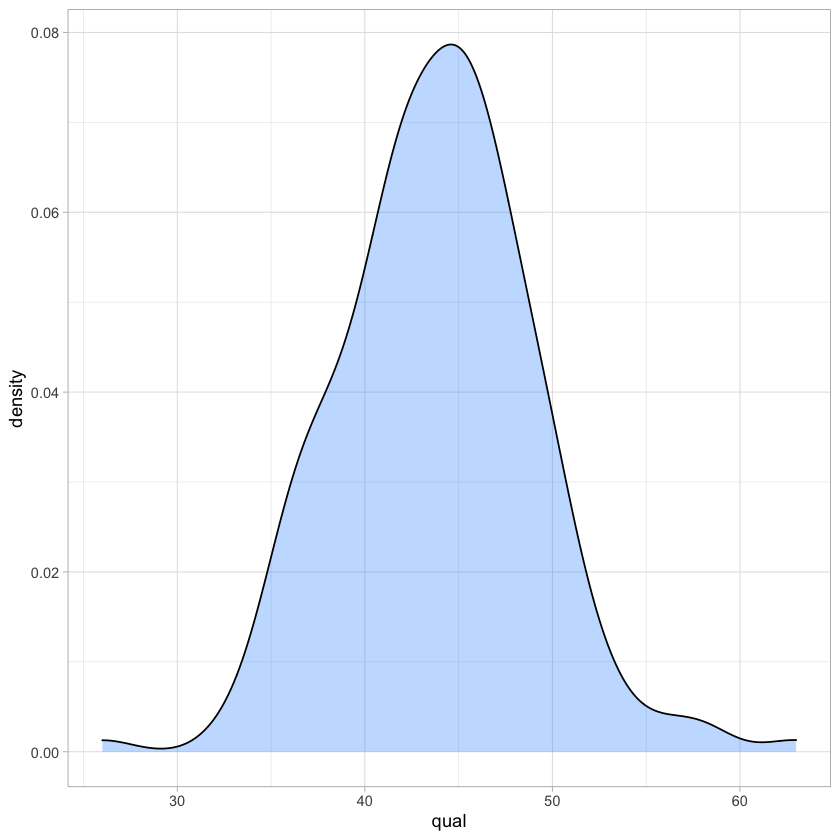

In [7]:
a <- ggplot(var_qual, aes(qual)) + geom_density(fill = "dodgerblue1", colour = "black", alpha = 0.3)
a + theme_light()

### Variant mean depth

The number of reads that have mapped to this position.

For vcftools is the mean of the read depth across all individuals - it is for both alleles at a position and is not partitioned between the reference and the alternative

In [13]:
var_depth <- read_delim("./chr3_mwe.subset.ldepth.mean", delim = "\t",
           col_names = c("chr", "pos", "mean_depth", "var_depth"), skip = 1)
head(var_depth)

Parsed with column specification:
cols(
  chr = col_character(),
  pos = col_double(),
  mean_depth = col_double(),
  var_depth = col_double()
)



chr,pos,mean_depth,var_depth
<chr>,<dbl>,<dbl>,<dbl>
chr3,43332376,11.67810,13.70610
chr3,43340428,17.04030,5.32337
chr3,43348535,20.58050,30.12370
chr3,43372724,7.30615,10.34920
chr3,43549662,16.89340,12.24950
chr3,43576874,18.34340,51.38570


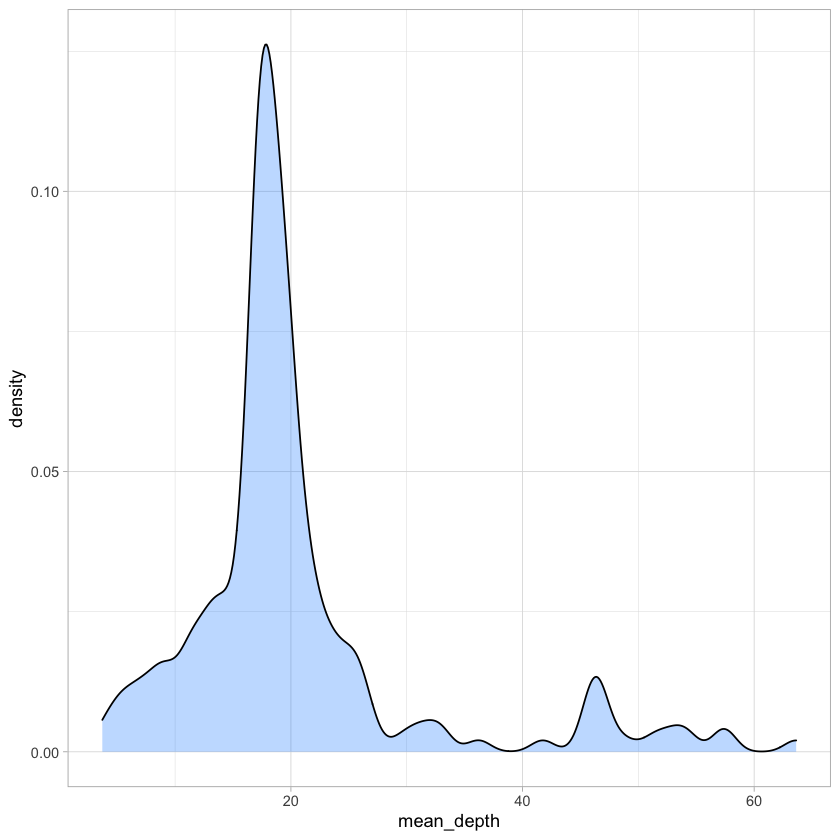

In [12]:
a <- ggplot(var_depth, aes(mean_depth)) + geom_density(fill = "dodgerblue1", colour = "black", alpha = 0.3)
a + theme_light()

In [14]:
summary(var_depth$mean_depth)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.716  16.785  18.157  20.429  21.122  63.626 

### Variant missingness

How many individuals lack a genotype at a call site

In [17]:
var_miss <- read_delim("./chr3_mwe.subset.lmiss", delim = "\t",
                       col_names = c("chr", "pos", "nchr", "nfiltered", "nmiss", "fmiss"), skip = 1)
head(var_miss)

Parsed with column specification:
cols(
  chr = col_character(),
  pos = col_double(),
  nchr = col_double(),
  nfiltered = col_double(),
  nmiss = col_double(),
  fmiss = col_double()
)



chr,pos,nchr,nfiltered,nmiss,fmiss
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr3,43332376,401286,0,5100,0.012709100
chr3,43340428,401286,0,0,0.000000000
chr3,43348535,401286,0,0,0.000000000
chr3,43372724,401286,0,1986,0.004949090
chr3,43549662,401286,0,182,0.000453542
chr3,43576874,401286,0,0,0.000000000


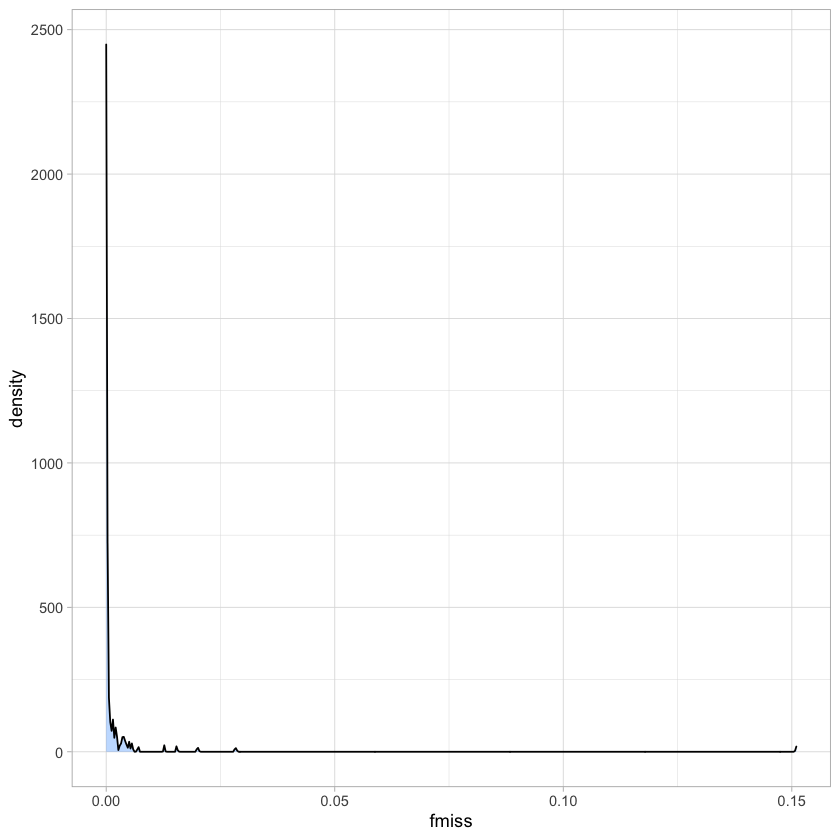

In [18]:
a <- ggplot(var_miss, aes(fmiss)) + geom_density(fill = "dodgerblue1", colour = "black", alpha = 0.3)
a + theme_light()

In [19]:
summary(var_miss$fmiss)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.000e+00 0.000e+00 9.970e-06 1.692e-03 3.638e-04 1.510e-01 

### Minor allele frequency

In [21]:
var_freq <- read_delim("./chr3_mwe.subset.frq", delim = "\t",
                       col_names = c("chr", "pos", "nalleles", "nchr", "a1", "a2"), skip = 1)
head(var_freq)

Parsed with column specification:
cols(
  chr = col_character(),
  pos = col_double(),
  nalleles = col_double(),
  nchr = col_double(),
  a1 = col_double(),
  a2 = col_double()
)



chr,pos,nalleles,nchr,a1,a2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr3,43340428,2,401286,0.999873,1.27091e-04
chr3,43348535,2,401286,0.999995,4.98398e-06
chr3,43372724,2,399300,0.999992,7.51315e-06
chr3,43549662,2,401104,0.999998,2.49312e-06
chr3,43576874,2,401286,0.994662,5.33784e-03
chr3,43598764,2,399532,0.999995,5.00586e-06


In [24]:
# find minor allele frequency
var_freq$maf <- var_freq %>% select(a1, a2) %>% apply(1, function(z) min(z))
head(var_freq )

chr,pos,nalleles,nchr,a1,a2,maf
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr3,43340428,2,401286,0.999873,1.27091e-04,1.27091e-04
chr3,43348535,2,401286,0.999995,4.98398e-06,4.98398e-06
chr3,43372724,2,399300,0.999992,7.51315e-06,7.51315e-06
chr3,43549662,2,401104,0.999998,2.49312e-06,2.49312e-06
chr3,43576874,2,401286,0.994662,5.33784e-03,5.33784e-03
chr3,43598764,2,399532,0.999995,5.00586e-06,5.00586e-06


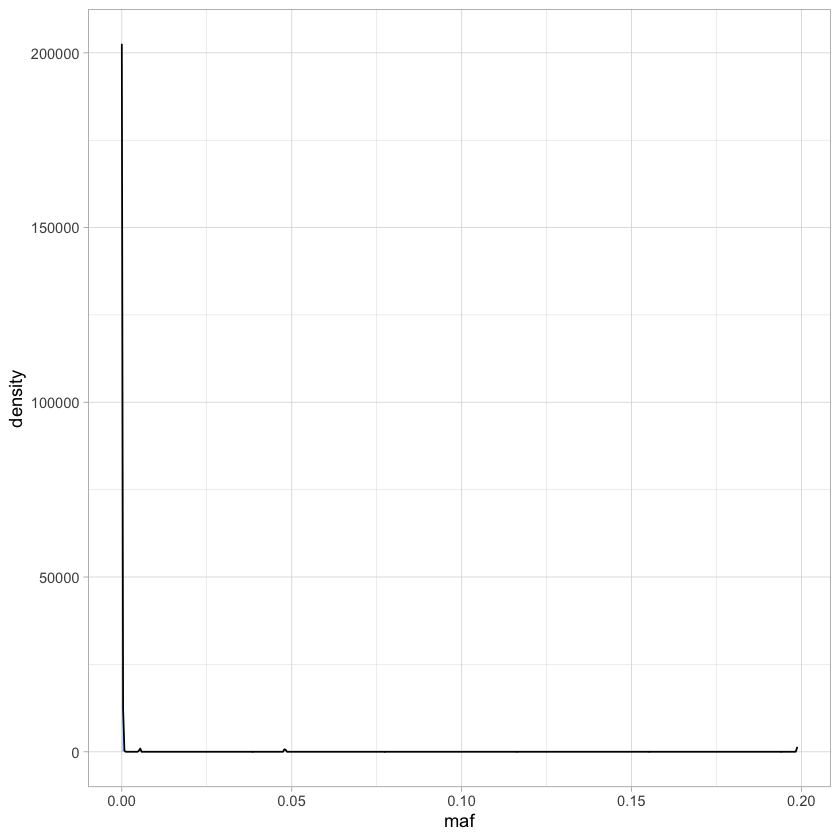

In [25]:
a <- ggplot(var_freq, aes(maf)) + geom_density(fill = "dodgerblue1", colour = "black", alpha = 0.3)
a + theme_light()

## Individual based statistics

### Mean depth per individual

In [27]:
ind_depth <- read_delim("./chr3_mwe.subset.idepth", delim = "\t",
                        col_names = c("ind", "nsites", "depth"), skip = 1)
head(ind_depth)                        

Parsed with column specification:
cols(
  ind = col_double(),
  nsites = col_double(),
  depth = col_double()
)



ind,nsites,depth
<dbl>,<dbl>,<dbl>
1434748,193,18.7772
5523981,193,22.7513
5023838,193,17.2850
4023729,193,20.1917
4442146,193,19.7358
5654789,193,19.8342


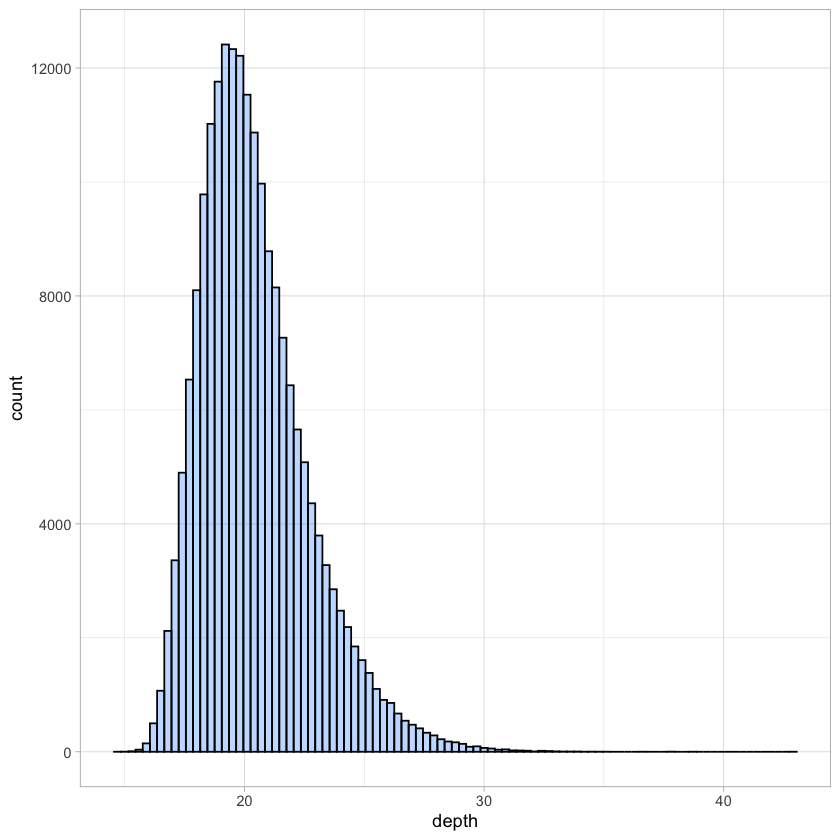

In [32]:
a <- ggplot(ind_depth, aes(depth)) + geom_histogram(fill = "dodgerblue1", colour = "black", alpha = 0.3, binwidth=0.3)
a + theme_light()

### Proportion of missing data per individual

In [33]:
ind_miss  <- read_delim("./chr3_mwe.subset.imiss", delim = "\t",
                        col_names = c("ind", "ndata", "nfiltered", "nmiss", "fmiss"), skip = 1)

Parsed with column specification:
cols(
  ind = col_double(),
  ndata = col_double(),
  nfiltered = col_double(),
  nmiss = col_double(),
  fmiss = col_double()
)



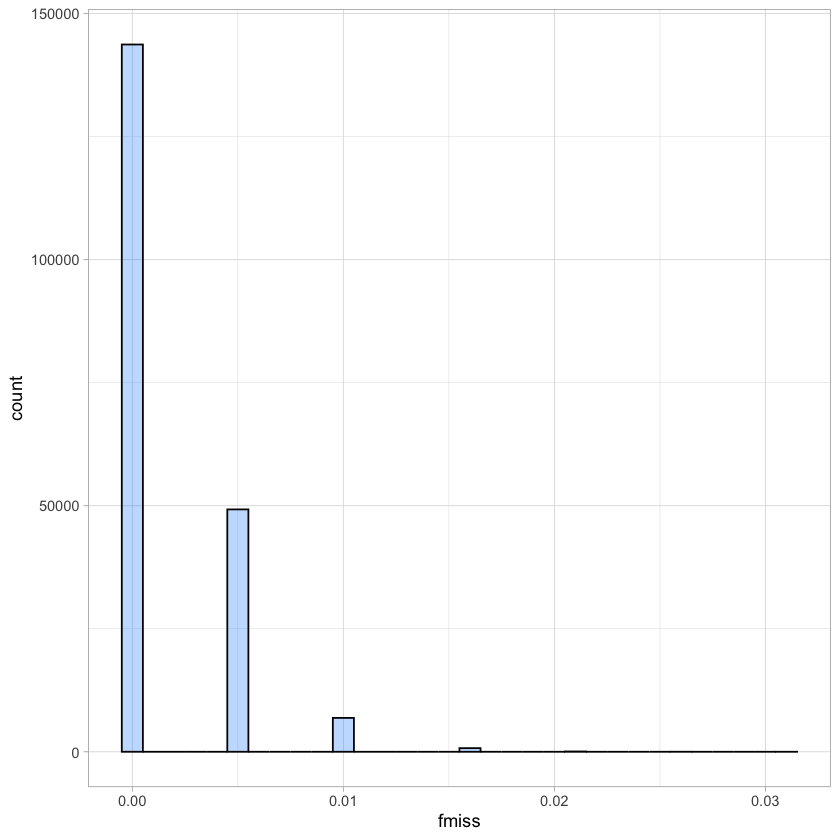

In [39]:
a <- ggplot(ind_miss, aes(fmiss)) + geom_histogram(fill = "dodgerblue1", colour = "black", alpha = 0.3, binwidth=0.001)
a + theme_light()

### Heterozygosity and inbreeding coefficient per individual

High levels of allelic dropout/ allele with insufficient amplification (strongly negative F) or DNA contamination (highly positive F)

In [40]:
ind_het <- read_delim("./chr3_mwe.subset.het", delim = "\t",
           col_names = c("ind","ho", "he", "nsites", "f"), skip = 1)

Parsed with column specification:
cols(
  ind = col_double(),
  ho = col_double(),
  he = col_double(),
  nsites = col_double(),
  f = col_double()
)



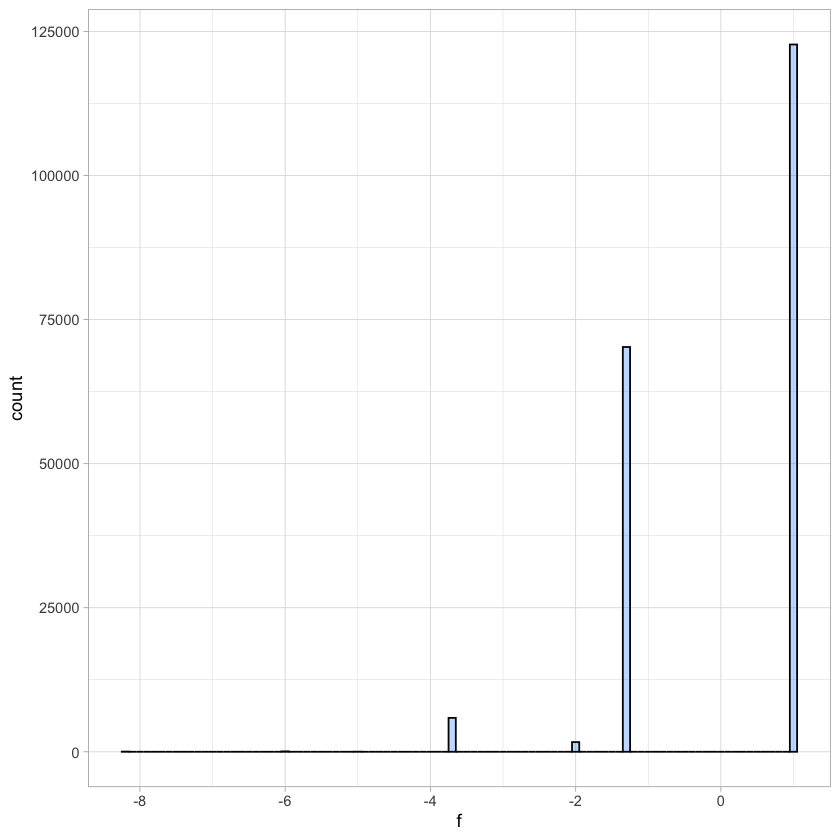

In [42]:
a <- ggplot(ind_het, aes(f)) + geom_histogram(fill = "dodgerblue1", colour = "black", alpha = 0.3, binwidth=0.1)
a + theme_light()

# Applying filters to the VCF

In [ ]:
VCF_IN=/mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/chr3_mwe.subset.vcf.gz
VCF_OUT=/mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/chr3_mwe.subset_filtered.vcf.gz

## Set the filters

In [ ]:
MAF=0.1
MISS=0.9
QUAL=30
MIN_DEPTH=10
MAX_DEPTH=50

In [ ]:
# move to the vcf directory
cd vcf
# perform the filtering with vcftools
vcftools --gzvcf $VCF_IN \
--remove-indels --maf $MAF --max-missing $MISS --minQ $QUAL \
--min-meanDP $MIN_DEPTH --max-meanDP $MAX_DEPTH \
--minDP $MIN_DEPTH --maxDP $MAX_DEPTH --recode --stdout | gzip -c > \
$VCF_OUT


## Investigate the difference in samples for chr 2 and chr22 that are haing problems in the merge

In [1]:
bcftools query -l /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/plink_files/cache/ukb23156_c2_b58_v1.leftnorm.filtered.vcf.gz > /home/dmc2245/ukb23156_c2_b58_v1.samples

In [4]:
bcftools query -l /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/plink_files/cache/ukb23156_c2_b57_v1.leftnorm.filtered.vcf.gz > /home/dmc2245/ukb23156_c2_b57_v1.samples

In [ ]:
awk 'FNR==NR{a[$1];next}($1 in a){print}'  /home/dmc2245/ukb23156_c2_b58_v1.samples /home/dmc2245/ukb23156_c2_b57_v1.samples

In [5]:
bcftools query -l /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/plink_files/cache/ukb23156_c2_b59_v1.leftnorm.filtered.vcf.gz > /home/dmc2245/ukb23156_c2_b59_v1.samples

In [7]:
bcftools query -l /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/plink_files/cache/ukb23156_c2_b70_v1.leftnorm.filtered.vcf.gz > /home/dmc2245/ukb23156_c2_b70_v1.samples

In [6]:
bcftools query -l /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/plink_files/cache/ukb23156_c2_b0_v1.leftnorm.filtered.vcf.gz > /home/dmc2245/ukb23156_c2_b0_v1.samples

In [8]:
bcftools query -l /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/plink_files/cache/ukb23156_c3_b0_v1.leftnorm.filtered.vcf.gz > /home/dmc2245/ukb23156_c3_b0_v1.samples

In [ ]:
cat /home/dmc2245/ukb23156_c2_b58_v1.samples | sort -n | head -n 20

In [9]:
comm <(sort /home/dmc2245/ukb23156_c2_b57_v1.samples) <(sort /home/dmc2245/ukb23156_c2_b58_v1.samples) -3

	-000016
	-000017
	-000018
1533484
2284688
3081695


In [2]:
bcftools query -l  /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/plink_files/cache/ukb23156_c20_b3_v1.leftnorm.filtered.vcf.gz > /home/dmc2245/ukb23156_c20_b3_v1.samples

In [1]:
bcftools query -l  /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/plink_files/cache/ukb23156_c20_b0_v1.leftnorm.filtered.vcf.gz > /home/dmc2245/ukb23156_c20_b0_v1.samples

### Different sample names in /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/plink_files/cache/ukb23156_c2_b63_v1.leftnorm.filtered.vcf.gz. Perhaps "bcftools merge" is what you are looking for?

In [3]:
bcftools query -l /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/plink_files/cache/ukb23156_c2_b63_v1.leftnorm.filtered.vcf.gz > /home/dmc2245/ukb23156_c2_b63_v1.samples

In [10]:
diff -y  /home/dmc2245/ukb23156_c2_b58_v1.samples  /home/dmc2245/ukb23156_c2_b63_v1.samples > /home/dmc2245/different_chr2_b58_b63

: 1

### Different sample names in /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/plink_files/cache/ukb23156_c20_b4_v1.leftnorm.filtered.vcf.gz

In [4]:
bcftools query -l /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/plink_files/cache/ukb23156_c20_b4_v1.leftnorm.filtered.vcf.gz > /home/dmc2245/uukb23156_c20_b4_v1.samples

In [8]:
diff -y /home/dmc2245/ukb23156_c20_b3_v1.samples /home/dmc2245/uukb23156_c20_b4_v1.samples  > /home/dmc2245/different_chr20_b3_b4

: 1

In [17]:
for file in /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/plink_files/cache/ukb23156_c20_b*_v1.leftnorm.filtered.vcf.gz; do 
 new_file="$(echo $file | sed s/.filtered.vcf.gz/.samples/)"
 bcftools query -l $file > $new_file
 echo "$new_file" >> /home/dmc2245/grep_results_chr20_new.txt
 egrep "1533484|2284688|3081695" $new_file >> /home/dmc2245/grep_results_chr20_new.txt ;
 done

: 1

In [18]:
for file in /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/plink_files/cache/ukb23156_c2_b*_v1.leftnorm.filtered.vcf.gz; do 
 new_file="$(echo $file | sed s/.filtered.vcf.gz/.samples/)"
 bcftools query -l $file > $new_file
 echo "$new_file" >> /home/dmc2245/grep_results_chr2_new.txt
 egrep "1533484|2284688|3081695" $new_file >> /home/dmc2245/grep_results_chr2_new.txt ;
 done

: 1

## Reheader bcftools to change samples name

In [16]:
cd /mnt/mfs/statgen/UKBiobank/data/exome_files/project_VCF/testing_bcftools
bcftools reheader -s samples_name.txt  -o chr3_mwe.subset_2samples.rename.vcf.gz chr3_mwe.subset_2samples.filter_3.vcf.gz